<a href="https://colab.research.google.com/github/JaiswalFelipe/Optimization-Project/blob/main/OptimizationP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial imports and data load

ref: https://www.kaggle.com/datasets/neelkamal692/delhi-house-price-prediction?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delhi_raw = pd.read_csv('/content/drive/MyDrive/OptiData/MagicBricks.csv')
delhi_raw.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


# EDA

In [3]:
#Stats
delhi_raw.describe(include='all')

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1254,1259,1226.000000,1.259000e+03,1259,1259,1254,1018.000000
unique,NaN,NaN,NaN,3,365,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,Semi-Furnished,Lajpat Nagar 3,NaN,NaN,Ready_to_move,Resale,Builder_Floor,NaN
freq,NaN,NaN,NaN,708,34,NaN,NaN,1184,781,661,NaN
mean,1466.452724,2.796664,2.556086,NaN,NaN,1.935563,2.130670e+07,NaN,NaN,NaN,15690.136542
std,1568.055040,0.954425,1.042220,NaN,NaN,6.279212,2.560115e+07,NaN,NaN,NaN,21134.738568
min,28.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000e+06,NaN,NaN,NaN,1259.000000
25%,800.000000,2.000000,2.000000,NaN,NaN,1.000000,5.700000e+06,NaN,NaN,NaN,6364.000000
50%,1200.000000,3.000000,2.000000,NaN,NaN,1.000000,1.420000e+07,NaN,NaN,NaN,11291.500000
75%,1700.000000,3.000000,3.000000,NaN,NaN,2.000000,2.550000e+07,NaN,NaN,NaN,18000.000000


In [4]:
# Check for null values
delhi_raw.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
delhi_data = delhi_raw.dropna()
delhi_data.shape 

(1005, 11)

##### Select variables

In [6]:
# Not include 'Locality'
Features = ['Area', 'BHK', 'Bathroom', 'Furnishing',
       'Parking', 'Status', 'Transaction',
       'Type', 'Per_Sqft', 'Price']

# New data
delhi_data = delhi_data[Features]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69f9f55b50>,
      dtype=object)

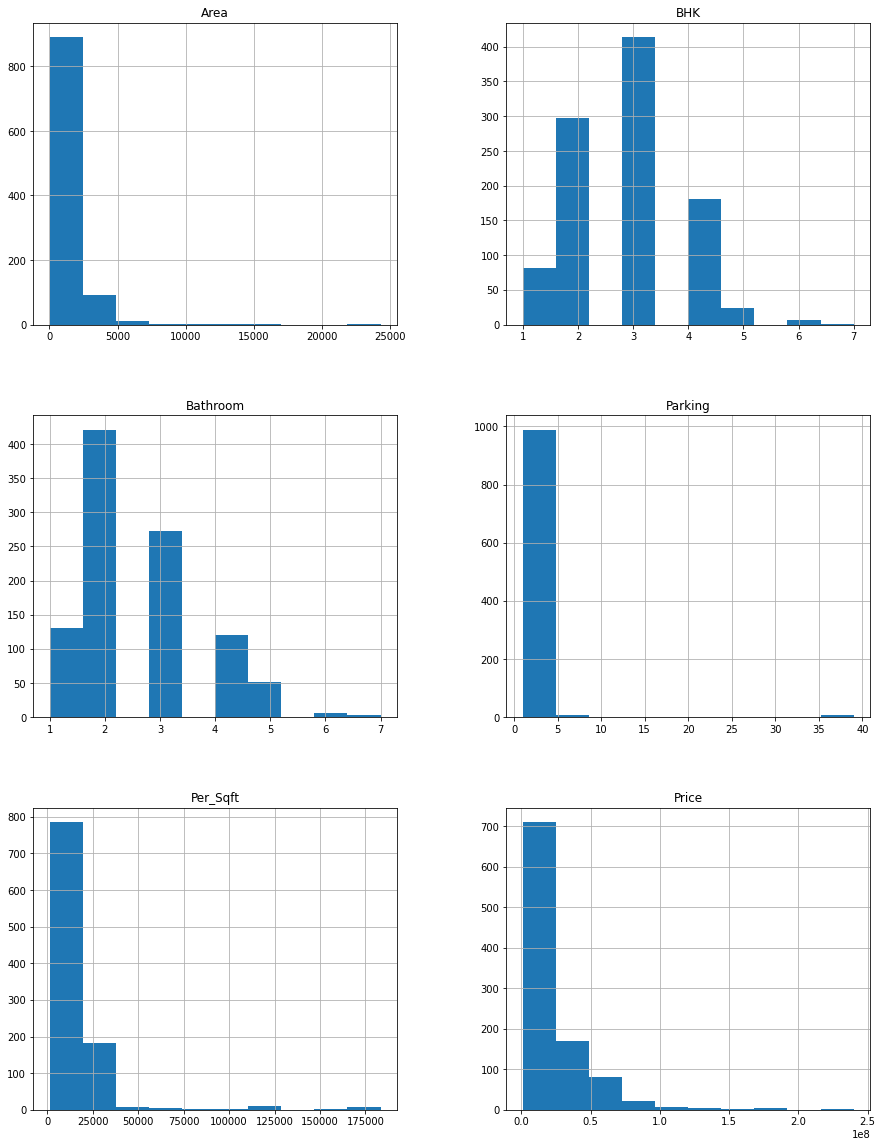

In [7]:
delhi_data.hist(figsize = (15,20))

Furnishing


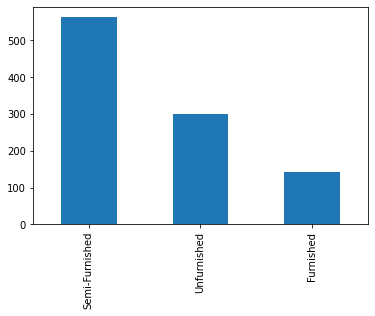

Status


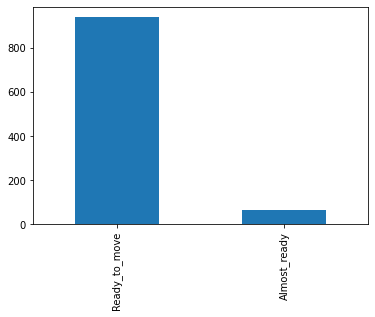

Transaction


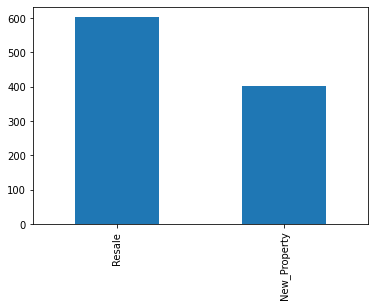

Type


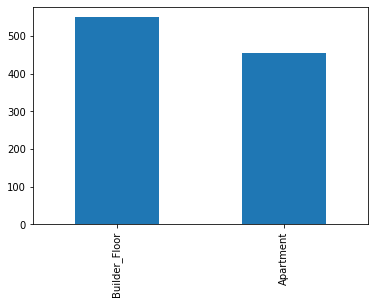

In [8]:
# this will list the non-numeric columns...

# so loop over all of them; count each unique value, and plot...
for col in delhi_data.select_dtypes(include=object).columns: 
    print(col)
    delhi_data[col].value_counts().plot(kind='bar')
    plt.show()

# Data Prep

### Data cleaning

##### Categorical data

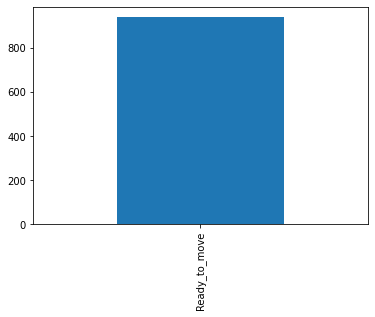

In [9]:
# Apartments only
delhi_data = delhi_data.loc[delhi_data['Status'] != 'Almost_ready']

# After cleaning
delhi_data['Status'].value_counts().plot(kind='bar')

In [10]:
# Now drop ''Status' column

delhi_data = delhi_data.drop(['Status'], axis=1)
delhi_data.shape

(940, 9)

##### Numerical data

In [11]:
# Max Area
delhi_data = delhi_data.loc[delhi_raw['Area'] <= 5000]

In [12]:
# Max BHK
delhi_data = delhi_data.loc[delhi_data['BHK'] <= 5]

In [13]:
# Max Parking slots
delhi_data = delhi_data.loc[delhi_data['Parking'] <= 5]

In [14]:
# Max Bathrooms
delhi_data = delhi_data.loc[delhi_data['Bathroom'] <= 5]

In [15]:
# Max Bathrooms
delhi_data = delhi_data.loc[delhi_data['Per_Sqft'] <= 30000]

In [16]:
# Final data 
delhi_data.shape

(853, 9)

##### Encode categorical variables

In [17]:
#
delhi_data = pd.get_dummies(delhi_data, drop_first=True)
delhi_data.describe(include='all')

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Transaction_Resale,Type_Builder_Floor
count,853.000000,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000
mean,1285.092549,2.705744,2.486518,1.398593,11342.763189,1.858004e+07,0.574443,0.294256,0.630715,0.543962
std,779.569250,0.876896,0.995940,0.687308,6531.881940,1.894746e+07,0.494717,0.455975,0.482894,0.498356
min,28.000000,1.000000,1.000000,1.000000,1667.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000
25%,765.000000,2.000000,2.000000,1.000000,6111.000000,5.000000e+06,0.000000,0.000000,0.000000,0.000000
50%,1100.000000,3.000000,2.000000,1.000000,10000.000000,1.300000e+07,1.000000,0.000000,1.000000,1.000000
75%,1600.000000,3.000000,3.000000,2.000000,15384.000000,2.500000e+07,1.000000,1.000000,1.000000,1.000000
max,4900.000000,5.000000,5.000000,5.000000,30000.000000,1.355000e+08,1.000000,1.000000,1.000000,1.000000


In [18]:
# Select features
selected_features = ['Area', 'BHK', 'Bathroom', 'Parking',
       'Per_Sqft', 'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished', 'Transaction_Resale',
       'Type_Builder_Floor']

delhi_data[selected_features]       

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Transaction_Resale,Type_Builder_Floor
1,750.0,2,2.0,1.0,6667.0,1,0,0,0
2,950.0,2,2.0,1.0,6667.0,0,0,1,0
3,600.0,2,2.0,1.0,6667.0,1,0,1,1
4,650.0,2,2.0,1.0,6667.0,1,0,0,1
5,1300.0,4,3.0,1.0,6667.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1253,1200.0,3,3.0,1.0,12916.0,1,0,1,1
1254,4118.0,4,5.0,3.0,12916.0,0,1,0,1
1255,1050.0,3,2.0,3.0,12916.0,1,0,1,1
1256,875.0,3,3.0,3.0,12916.0,1,0,0,1


### Final prep

In [19]:
# Train/test split
from sklearn.model_selection import train_test_split

df_copy = delhi_data.copy()
X = df_copy[selected_features]
y = df_copy['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#df_train = df_copy.sample(frac=0.70, random_state=1)
#df_test = df_copy.drop(df_train.index)
#print(len(df_train))
#print(len(df_test))

print(len(X_train))
print(len(X_val))
print(len(X_test))

545
137
171


In [31]:
X_train.shape
#Normalize
#from sklearn.preprocessing import StandardScaler

#ss_scaler = StandardScaler()
#X_train = ss_scaler.fit_transform(X_train)
#X_test = ss_scaler.fit_transform(X_test)

(545, 9)

# Modelling

##### Without tuning

In [42]:
# Initial model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring='r2')

cv_results.mean()

0.7462870488985619

##### Genetic algorithm for Hyperparameter tuning

In [20]:
!pip install tpot

In [21]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_val, y_val))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -81970548892656.1

Generation 2 - Current best internal CV score: -77813675538731.88

Generation 3 - Current best internal CV score: -77813675538731.88

Generation 4 - Current best internal CV score: -77813675538731.88

Generation 5 - Current best internal CV score: -77813675538731.88

Best pipeline: ExtraTreesRegressor(LassoLarsCV(input_matrix, normalize=True), bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=16, n_estimators=100)
-31250791926082.38


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LassoLarsCV was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.linear_model import LassoLarsCV
from xgboost import XGBRegressor
from sklearn import model_selection

pipeline = ExtraTreesRegressor(bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=16, n_estimators=100)
#exported_pipeline = ExtraTreesRegressor(bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=6, min_samples_split=4, n_estimators=100)
#kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = model_selection.cross_val_score(pipeline, X_train, y_train, scoring='r2')
#cv=kfold

#exported_pipeline.fit(train_x, train_y)
#results = exported_pipeline.predict(y_test)
print(cv_results.mean())

0.7787283467503328


In [ ]:
#best_pipeline = XGBRegressor(learning_rate = 0.1, max_depth=4, min_child_weight=18, n_estimators=100, n_jobs=1, subsample=0.3, verbosity=0)
#cv_results = model_selection.cross_val_score(best_pipeline, X_train, y_train, scoring='r2')
#print(cv_results.mean())

In [24]:
pipeline.fit(X_train, y_train)

ExtraTreesRegressor(max_features=0.6500000000000001, min_samples_leaf=2,
                    min_samples_split=16)

# Evaluation

In [25]:
# Evaluation
y_pred = pipeline.predict(X_test)

#from sklearn import metrics
print("r2:", metrics.r2_score(y_test, y_pred))

r2: 0.7651469981065505


# Save, load, predict

In [28]:
# save model
import pickle
pickle.dump(pipeline, open("savedmodel.sav", 'wb'))

In [38]:
delhi_data.describe(include='all')

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Transaction_Resale,Type_Builder_Floor
count,853.000000,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000
mean,1285.092549,2.705744,2.486518,1.398593,11342.763189,1.858004e+07,0.574443,0.294256,0.630715,0.543962
std,779.569250,0.876896,0.995940,0.687308,6531.881940,1.894746e+07,0.494717,0.455975,0.482894,0.498356
min,28.000000,1.000000,1.000000,1.000000,1667.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000
25%,765.000000,2.000000,2.000000,1.000000,6111.000000,5.000000e+06,0.000000,0.000000,0.000000,0.000000
50%,1100.000000,3.000000,2.000000,1.000000,10000.000000,1.300000e+07,1.000000,0.000000,1.000000,1.000000
75%,1600.000000,3.000000,3.000000,2.000000,15384.000000,2.500000e+07,1.000000,1.000000,1.000000,1.000000
max,4900.000000,5.000000,5.000000,5.000000,30000.000000,1.355000e+08,1.000000,1.000000,1.000000,1.000000


In [39]:
# 
sample_data = {'Area': [1300], 'BHK': [2], 'Bathroom': [2], 
               'Parking': [1], 'Per_Sqft': [20000], 'Furnishing_Semi-Furnished': [1],
               'Furnishing_Unfurnished': [0], 'Transaction_Resale': [1], 'Type_Builder_Floor': [1]}

test_sample = pd.DataFrame(data = sample_data)

In [40]:
# some time later...
# load the model from disk
saved_model = pickle.load(open("savedmodel.sav", 'rb'))
pred = saved_model.predict(test_sample)

pred

array([15547698.05390643])